In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
# ! pip install mlxtend

## Load Data

In [2]:
# load the data set ans show the first five transaction
url = 'https://raw.githubusercontent.com/sirjvp/housesales/main/listings.csv'
data = pd.read_csv(url)
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20201229152110,2021-01-03,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,Singapore,I am a private tutor by profession. My husband...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/2628b...,https://a0.muscache.com/im/pictures/user/2628b...,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Woodlands,North Region,1.44255,103.79580,Private room in apartment,Private room,1,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Cable TV"", ""Washer"", ""Wifi"", ""TV...",$79.00,180,360,180,180,360,360,180.0,360.0,NaN,t,30,60,90,365,2021-01-03,1,0,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20201229152110,2021-01-01,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Singapore, Singapore",Bukit Timah,Central Region,1.33235,103.78521,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Essentials"", ""Shampoo"", ""TV"", ""W...",$80.00,90,730,90,90,730,730,90.0,730.0,NaN,t,30,60,90,365,2021-01-01,18,0,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20201229152110,2021-01-01,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,Singapore,I am a private tutor by profession. My husband...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/2628b...,https://a0.muscache.com/im/pictures/user/2628b...,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Woodlands,North Region,1.44246,103.79667,Private room in apartment,Private room,1,NaN,1 bath,1.0,1.0,"[""Dryer"", ""Elevator"", ""Wifi"", ""TV"", ""Cable TV""...",$66.00,6,14,6,6,14,14,6.0,14.0,NaN,t,30,60,90,365,2021-01-01,20,0,0,2011-06-25,2015-10-01,98.0,10.0,10.0,10.0,10.0,8.0,9.0,NaN,f,2,0,2,0,0.17
3,71609,https://www.airbnb.com/rooms/71609,20201229152110,2021-01-01,Ensu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4387 non-null   int64  
 1   listing_url                                   4387 non-null   object 
 2   scrape_id                                     4387 non-null   int64  
 3   last_scraped                                  4387 non-null   object 
 4   name                                          4387 non-null   object 
 5   description                                   4246 non-null   object 
 6   neighborhood_overview                         2869 non-null   object 
 7   picture_url                                   4387 non-null   object 
 8   host_id                                       4387 non-null   int64  
 9   host_url                                      4387 non-null   o

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4387.0,2.928872e+07,1.324230e+07,4.909100e+04,1.908248e+07,3.180778e+07,4.115926e+07,4.732683e+07
scrape_id,4387.0,2.020123e+13,1.590025e+00,2.020123e+13,2.020123e+13,2.020123e+13,2.020123e+13,2.020123e+13
host_id,4387.0,1.182706e+08,1.095252e+08,2.277960e+05,2.542250e+07,7.104704e+07,1.904149e+08,3.819318e+08
host_listings_count,4376.0,4.710032e+01,7.247388e+01,0.000000e+00,2.000000e+00,1.300000e+01,5.300000e+01,2.750000e+02
host_total_listings_count,4376.0,4.710032e+01,7.247388e+01,0.000000e+00,2.000000e+00,1.300000e+01,5.300000e+01,2.750000e+02
latitude,4387.0,1.313209e+00,3.173796e-02,1.245300e+00,1.293215e+00,1.310420e+00,1.322170e+00,1.453280e+00
longitude,4387.0,1.038474e+02,4.093549e-02,1.036469e+02,1.038373e+02,1.038495e+02,1.038622e+02,1.039686e+02
accommodates,4387.0,2.956006e+00,2.395966e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,3994.0,1.337757e+00,7.188504e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [ ]:
data.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1844
Length: 74, dtype: int64

In [ ]:
# load the data set ans show the first five transaction
url2 = 'https://raw.githubusercontent.com/sirjvp/housesales/main/neighbourhoods.csv'
data2 = pd.read_csv(url2)
data2

,neighbourhood_group,neighbourhood
0,Central Region,Bishan
1,Central Region,Bukit Merah
2,Central Region,Bukit Timah
3,Central Region,Downtown Core
4,Central Region,Geylang
5,Central Region,Kallang
6,Central Region,Marina East
7,Central Region,Marina South
8,Central Region,Marine Parade
9,Central Region,Museum


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  55 non-null     object
 1   neighbourhood        55 non-null     object
dtypes: object(2)
memory usage: 1008.0+ bytes


In [ ]:
data2.describe()

,neighbourhood_group,neighbourhood
count,55,55
unique,5,55
top,Central Region,Kallang
freq,22,1


In [ ]:
data2.isna().any()

neighbourhood_group    False
neighbourhood          False
dtype: bool

# Data Preparation

In [3]:
dataset = data[['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
                'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'accommodates', 'bathrooms_text', 'bedrooms',
                'beds', 'number_of_reviews', 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                'review_scores_location','review_scores_value','instant_bookable', 'amenities', 'price']]
dataset.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities,price
0,2010-10-20,within a day,100%,NaN,2.0,t,Woodlands,Private room in apartment,1,1 bath,1.0,1.0,1,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,"[""Elevator"", ""Cable TV"", ""Washer"", ""Wifi"", ""TV...",$79.00
1,2010-09-08,a few days or more,0%,NaN,1.0,t,Bukit Timah,Private room in apartment,2,1 bath,1.0,1.0,18,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,"[""Elevator"", ""Essentials"", ""Shampoo"", ""TV"", ""W...",$80.00
2,2010-10-20,within a day,100%,NaN,2.0,t,Woodlands,Private room in apartment,1,1 bath,1.0,1.0,20,98.0,10.0,10.0,10.0,10.0,8.0,9.0,f,"[""Dryer"", ""Elevator"", ""Wifi"", ""TV"", ""Cable TV""...",$66.00
3,2011-01-29,within a few hours,100%,100%,8.0,t,Tampines,Private room in villa,6,1 private bath,2.0,3.0,20,89.0,9.0,8.0,9.0,10.0,9.0,9.0,f,"[""Dryer"", ""Dedicated workspace"", ""Shampoo"", ""W...",$174.00
4,2011-01-29,within a few hours,100%,100%,8.0,t,Tampines,Private room in house,3,Shared half-bath,1.0,1.0,24,83.0,8.0,8.0,9.0,9.0,8.0,8.0,f,"[""Dryer"", ""Essentials"", ""Shampoo"", ""Wifi"", ""TV...",$93.00


In [ ]:
dataset.isna().sum()

host_since                       11
host_response_time              581
host_response_rate              581
host_acceptance_rate            719
host_listings_count              11
host_identity_verified           11
neighbourhood_cleansed            0
property_type                     0
accommodates                      0
bathrooms_text                   15
bedrooms                        393
beds                             59
number_of_reviews                 0
review_scores_rating           1905
review_scores_accuracy         1910
review_scores_cleanliness      1909
review_scores_checkin          1911
review_scores_communication    1910
review_scores_location         1912
review_scores_value            1912
instant_bookable                  0
amenities                         0
price                             0
dtype: int64

In [4]:
# Menghilangkan simbol $ pada kolom price dan mengubah tipe datanya dari string menjadi float
dataset['price'] = dataset['price'].astype(str).str.slice(1).str.replace(',','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


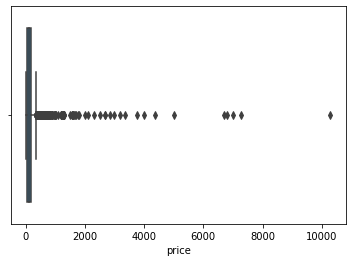

In [5]:
sns.boxplot(dataset['price'], fliersize=5)

In [6]:
dataset['price'].describe()

count     4387.000000
mean       170.926601
std        349.092510
min         13.000000
25%         61.000000
50%        114.000000
75%        179.000000
max      10286.000000
Name: price, dtype: float64

In [7]:
#remove outlier
dataset = dataset[dataset['price'] <= 300]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


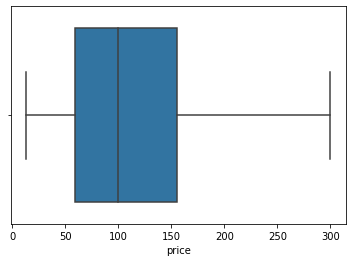

In [ ]:
#boxplot sesudah outlier diremove
sns.boxplot(dataset['price'])

Text(0, 0.5, 'Frequency')

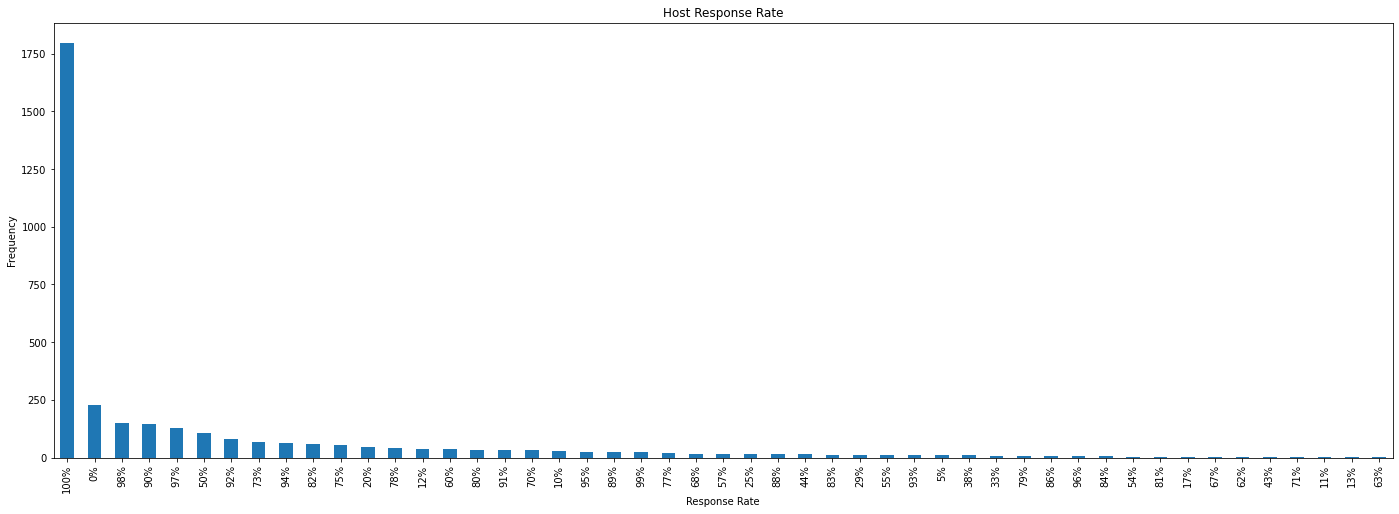

In [ ]:
plot = dataset['host_response_rate'].value_counts().plot(kind='bar', figsize=(24,8), title='Host Response Rate')
plot.set_xlabel('Response Rate')
plot.set_ylabel('Frequency')

In [8]:
# data NA diganti dengan 100 karena modus dari atribut ini sangat jauh dibandingkan dengan frekuensi angka-angka lain
dataset['host_response_rate'] = dataset['host_response_rate'].astype(str).str[:-1].str.replace('na', '100').astype(float)

Text(0, 0.5, 'Frequency')

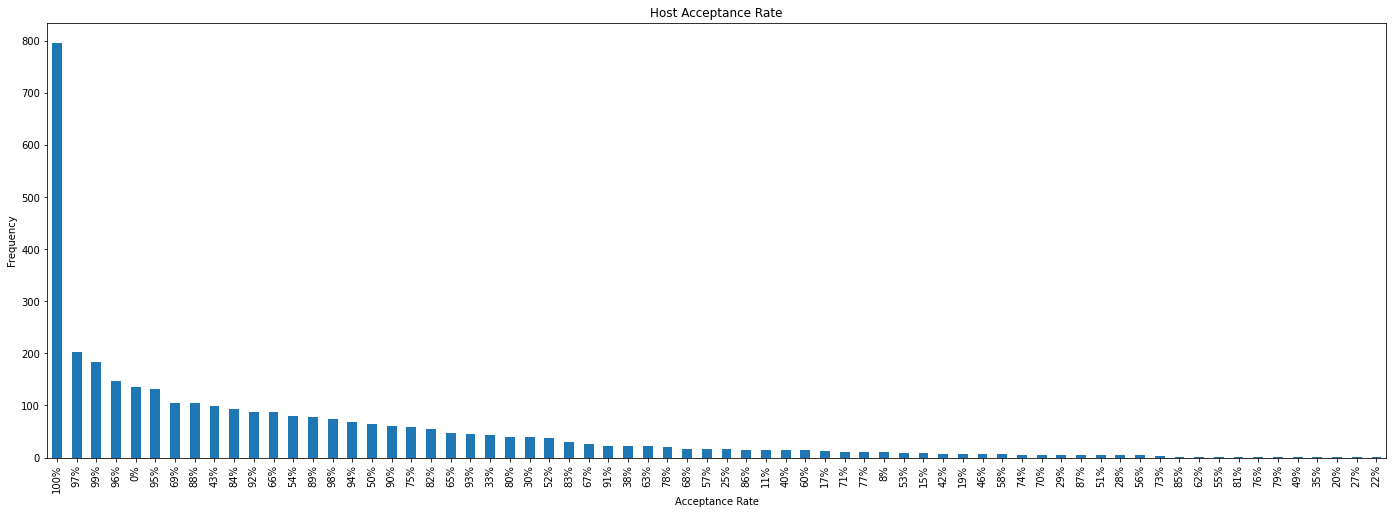

In [9]:
plot = dataset['host_acceptance_rate'].value_counts().plot(kind='bar', figsize=(24,8), title='Host Acceptance Rate')
plot.set_xlabel('Acceptance Rate')
plot.set_ylabel('Frequency')

In [10]:
# data NA diganti 100 karena modus dari atribut ini sangat jauh dibandingkan dengan frekuensi angka-angka lain
dataset['host_acceptance_rate'] = dataset['host_acceptance_rate'].astype(str).str[:-1].str.replace('na', '100').astype(float)

In [11]:
#mengganti host since menjadi sudah berapa tahun menjadi host      
dataset['host_since'] = 2021 - dataset['host_since'].astype(str).str[:4].astype(float)

In [12]:
# NA handling untuk continous variabel
dataset.host_since.fillna(value= dataset.host_since.mean(), inplace= True)
dataset.host_listings_count.fillna(value= dataset.host_listings_count.mean(), inplace= True)
dataset.bedrooms.fillna(value= dataset.bedrooms.mean(), inplace= True)
dataset.review_scores_cleanliness.fillna(value= dataset.review_scores_cleanliness.mean(), inplace= True)
dataset.beds.fillna(value= dataset.beds.mean(), inplace= True)
dataset.review_scores_value.fillna(value= dataset.review_scores_value.mean(), inplace= True)
dataset.review_scores_checkin.fillna(value= dataset.review_scores_checkin.mean(), inplace= True)
dataset.review_scores_rating.fillna(value= dataset.review_scores_rating.mean(), inplace= True)
dataset.host_response_rate.fillna(value= dataset.host_response_rate.mean(), inplace= True)
dataset.review_scores_accuracy.fillna(value= dataset.review_scores_accuracy.mean(), inplace= True)
dataset.review_scores_location.fillna(value= dataset.review_scores_location.mean(), inplace= True)
dataset.review_scores_communication.fillna(value= dataset.review_scores_communication.mean(), inplace= True)

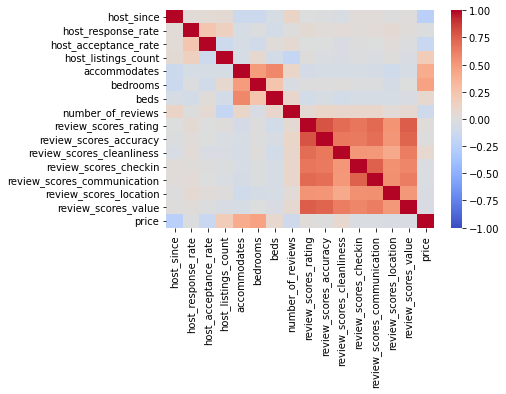

In [13]:
corr = dataset.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')

In [ ]:
corr['price']

host_since                    -0.237725
host_response_rate            -0.013782
host_acceptance_rate          -0.141571
host_listings_count            0.193776
accommodates                   0.401382
bedrooms                       0.458789
beds                           0.073862
number_of_reviews             -0.103771
review_scores_rating           0.020369
review_scores_accuracy         0.004404
review_scores_cleanliness      0.075024
review_scores_checkin         -0.030530
review_scores_communication   -0.028655
review_scores_location        -0.033870
review_scores_value           -0.035848
price                          1.000000
Name: price, dtype: float64

In [14]:
# drop data dengan correlation kecil (0.1 s.d. -0.1)
drop_1 = set(corr.index[corr['price'] <= 0.1])
drop_2 = set(corr.index[corr['price'] >= -0.1])
drop = list(drop_1.intersection(drop_2))
dataset.drop(drop, axis=1, inplace=True)
drop

['review_scores_communication',
 'review_scores_value',
 'host_response_rate',
 'beds',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_rating',
 'review_scores_location']

In [15]:
dataset.head()

,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,number_of_reviews,instant_bookable,amenities,price
0,11.0,within a day,100.0,2.0,t,Woodlands,Private room in apartment,1,1 bath,1.0,1,f,"[""Elevator"", ""Cable TV"", ""Washer"", ""Wifi"", ""TV...",79.0
1,11.0,a few days or more,100.0,1.0,t,Bukit Timah,Private room in apartment,2,1 bath,1.0,18,f,"[""Elevator"", ""Essentials"", ""Shampoo"", ""TV"", ""W...",80.0
2,11.0,within a day,100.0,2.0,t,Woodlands,Private room in apartment,1,1 bath,1.0,20,f,"[""Dryer"", ""Elevator"", ""Wifi"", ""TV"", ""Cable TV""...",66.0
3,10.0,within a few hours,100.0,8.0,t,Tampines,Private room in villa,6,1 private bath,2.0,20,f,"[""Dryer"", ""Dedicated workspace"", ""Shampoo"", ""W...",174.0
4,10.0,within a few hours,100.0,8.0,t,Tampines,Private room in house,3,Shared half-bath,1.0,24,f,"[""Dryer"", ""Essentials"", ""Shampoo"", ""Wifi"", ""TV...",93.0


In [16]:
dataset.isna().sum()

host_since                  0
host_response_time        513
host_acceptance_rate        0
host_listings_count         0
host_identity_verified     10
neighbourhood_cleansed      0
property_type               0
accommodates                0
bathrooms_text             15
bedrooms                    0
number_of_reviews           0
instant_bookable            0
amenities                   0
price                       0
dtype: int64

In [17]:
dataset.dropna(axis = 0, how ='any', inplace=True)

In [18]:
label_encoder = preprocessing.LabelEncoder()
dataset['neighbourhood_cleansed'] = label_encoder.fit_transform(dataset['neighbourhood_cleansed']) 
dataset['property_type'] = label_encoder.fit_transform(dataset['property_type'])
dataset['bathrooms_text'] = label_encoder.fit_transform(dataset['bathrooms_text'].astype(str).str.replace('<','less than'))

response_dict = {'within a day':0, 'a few days or more':1, 'within a few hours':2, 'within an hour':3}
identity_dict = {'f':0, 't':1}
instant_dict = {'f':0, 't':1}
dataset.host_response_time = dataset.host_response_time.replace(response_dict)
dataset.host_identity_verified = dataset.host_identity_verified.replace(identity_dict)
dataset.instant_bookable = dataset.instant_bookable.replace(instant_dict)
dataset.head()

,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,number_of_reviews,instant_bookable,amenities,price
0,11.0,0,100.0,2.0,1,36,12,1,2,1.0,1,0,"[""Elevator"", ""Cable TV"", ""Washer"", ""Wifi"", ""TV...",79.0
1,11.0,1,100.0,1.0,1,6,12,2,2,1.0,18,0,"[""Elevator"", ""Essentials"", ""Shampoo"", ""TV"", ""W...",80.0
2,11.0,0,100.0,2.0,1,36,12,1,2,1.0,20,0,"[""Dryer"", ""Elevator"", ""Wifi"", ""TV"", ""Cable TV""...",66.0
3,10.0,2,100.0,8.0,1,33,26,6,3,2.0,20,0,"[""Dryer"", ""Dedicated workspace"", ""Shampoo"", ""W...",174.0
4,10.0,2,100.0,8.0,1,33,21,3,37,1.0,24,0,"[""Dryer"", ""Essentials"", ""Shampoo"", ""Wifi"", ""TV...",93.0


In [19]:
#cek terakhir untuk NA
dataset.isna().sum()

host_since                0
host_response_time        0
host_acceptance_rate      0
host_listings_count       0
host_identity_verified    0
neighbourhood_cleansed    0
property_type             0
accommodates              0
bathrooms_text            0
bedrooms                  0
number_of_reviews         0
instant_bookable          0
amenities                 0
price                     0
dtype: int64

# One Hot encoding

In [20]:
# Ubah tipe data dari kolom 'amenities' dari string menjadi list
def remove_petik(isi):
  jadi = ''
  for letter in isi:
    if letter != '"':
      jadi += letter
  return jadi
test = dataset['amenities'].copy()
for i in range (len(test.index)):
  data = test.iloc[i]
  data = data[1:-1]
  items = data.split(',')
  for item in items:
    item = remove_petik(item)
  test[i] = items

In [21]:
# Membuat DataFrame baru berisi hasil One-Hot Encoding
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(test),
                   columns=mlb.classes_,
                   index=test.index)
res

,,,"""32\"" HDTV""","""Air conditioning""","""BBQ grill""","""Baby bath""","""Baby monitor""","""Baby safety gates""","""Babysitter recommendations""","""Baking sheet""","""Barbecue utensils""","""Bathtub""","""Beach essentials""","""Beachfront""","""Bed linens""","""Bidet""","""Body soap""","""Bread maker""","""Breakfast""","""Building staff""","""Cable TV""","""Carbon monoxide alarm""","""Ceiling fan""","""Central air conditioning""","""Changing table""","""Children\u2019s books and toys""","""Children\u2019s dinnerware""","""Cleaning before checkout""","""Cleaning products""","""Clothing storage""","""Clothing storage: closet""","""Coffee maker""","""Conditioner""","""Cooking basics""","""Crib""","""Dedicated workspace""","""Dining table""","""Dishes and silverware""","""Dishwasher""","""Dryer \u2013 In building""",...,I,K,L,M,N,O,P,Q,R,S,T,V,W,[,\,],a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,v,w,x,y,z
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3429,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3430,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3435,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Menghilangkan kolom-kolom yang tidak perlu dari dataframe
drop=[]
for col in res:
  if len(col) == 1:
    drop.append(col)
res.drop(drop, axis=1, inplace=True)
res.head()

,,"""32\"" HDTV""","""Air conditioning""","""BBQ grill""","""Baby bath""","""Baby monitor""","""Baby safety gates""","""Babysitter recommendations""","""Baking sheet""","""Barbecue utensils""","""Bathtub""","""Beach essentials""","""Beachfront""","""Bed linens""","""Bidet""","""Body soap""","""Bread maker""","""Breakfast""","""Building staff""","""Cable TV""","""Carbon monoxide alarm""","""Ceiling fan""","""Central air conditioning""","""Changing table""","""Children\u2019s books and toys""","""Children\u2019s dinnerware""","""Cleaning before checkout""","""Cleaning products""","""Clothing storage""","""Clothing storage: closet""","""Coffee maker""","""Conditioner""","""Cooking basics""","""Crib""","""Dedicated workspace""","""Dining table""","""Dishes and silverware""","""Dishwasher""","""Dryer \u2013 In building""","""Dryer \u2013\u00a0In unit""",...,"""Babysitter recommendations""","""Beachfront""","""Bed linens""","""Body soap""","""Breakfast""","""Cable TV""","""Cleaning before checkout""","""Coffee maker""","""Cooking basics""","""Dedicated workspace""","""Dishes and silverware""","""Dishwasher""","""Dryer""","""Elevator""","""Essentials""","""Extra pillows and blankets""","""Fire extinguisher""","""First aid kit""","""Free parking on premises""","""Free street parking""","""HDTV""","""Hair dryer""","""Heating""","""High chair""","""Hot tub""","""Iron""","""Keypad""","""Kitchen""","""Lock on bedroom door""","""Lockbox""","""Pack \u2019n Play/travel crib""","""Paid parking on premises""","""Pool""","""Private entrance""","""Shampoo""","""Smart lock""","""TV""","""Washer \u2013\u00a0In building""","""Washer""","""Wifi"""
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
new = pd.concat([dataset, res], axis=1)
new.drop('amenities', axis=1, inplace=True)
new.head()

,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,accommodates,bathrooms_text,bedrooms,number_of_reviews,instant_bookable,price,,"""32\"" HDTV""","""Air conditioning""","""BBQ grill""","""Baby bath""","""Baby monitor""","""Baby safety gates""","""Babysitter recommendations""","""Baking sheet""","""Barbecue utensils""","""Bathtub""","""Beach essentials""","""Beachfront""","""Bed linens""","""Bidet""","""Body soap""","""Bread maker""","""Breakfast""","""Building staff""","""Cable TV""","""Carbon monoxide alarm""","""Ceiling fan""","""Central air conditioning""","""Changing table""","""Children\u2019s books and toys""","""Children\u2019s dinnerware""","""Cleaning before checkout""",...,"""Babysitter recommendations""","""Beachfront""","""Bed linens""","""Body soap""","""Breakfast""","""Cable TV""","""Cleaning before checkout""","""Coffee maker""","""Cooking basics""","""Dedicated workspace""","""Dishes and silverware""","""Dishwasher""","""Dryer""","""Elevator""","""Essentials""","""Extra pillows and blankets""","""Fire extinguisher""","""First aid kit""","""Free parking on premises""","""Free street parking""","""HDTV""","""Hair dryer""","""Heating""","""High chair""","""Hot tub""","""Iron""","""Keypad""","""Kitchen""","""Lock on bedroom door""","""Lockbox""","""Pack \u2019n Play/travel crib""","""Paid parking on premises""","""Pool""","""Private entrance""","""Shampoo""","""Smart lock""","""TV""","""Washer \u2013\u00a0In building""","""Washer""","""Wifi"""
0,11.0,0.0,100.0,2.0,1.0,36.0,12.0,1.0,2.0,1.0,1.0,0.0,79.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11.0,1.0,100.0,1.0,1.0,6.0,12.0,2.0,2.0,1.0,18.0,0.0,80.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11.0,0.0,100.0,2.0,1.0,36.0,12.0,1.0,2.0,1.0,20.0,0.0,66.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10.0,2.0,100.0,8.0,1.0,33.0,26.0,6.0,3.0,2.0,20.0,0.0,174.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10.0,2.0,100.0,8.0,1.0,33.0,21.0,3.0,37.0,1.0,24.0,0.0,93.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
new.isna().sum()

host_since                          774
host_response_time                  774
host_acceptance_rate                774
host_listings_count                 774
host_identity_verified              774
                                   ... 
"Smart lock"                          0
"TV"                                  0
"Washer \u2013\u00a0In building"      0
"Washer"                              0
"Wifi"                                0
Length: 189, dtype: int64

In [25]:
new.dropna(axis = 0, how ='any', inplace=True)

In [26]:
new.isna().any()

host_since                          False
host_response_time                  False
host_acceptance_rate                False
host_listings_count                 False
host_identity_verified              False
                                    ...  
"Smart lock"                        False
"TV"                                False
"Washer \u2013\u00a0In building"    False
"Washer"                            False
"Wifi"                              False
Length: 189, dtype: bool

In [27]:
# split data as X and y
x, y = new.loc[:,new.columns != 'price'], new.loc[:, 'price']

In [28]:
# standardize feature set
scaler = StandardScaler()
standard = pd.DataFrame(scaler.fit_transform(x))
standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,2.603506,-1.818335,0.737372,-0.680817,0.395959,2.162841,-0.078093,-0.810523,-0.724048,-0.452305,-0.381189,-0.706646,-0.05112,0.0,0.562076,-0.285356,-0.088774,0.0,-0.01702,-0.04507,-0.034055,-0.068229,-0.119978,-0.03808,-0.056532,-0.790049,-0.034055,-0.138511,-0.048189,-0.294164,-0.235197,2.292474,-0.383635,-0.078223,-0.01702,-0.01702,-0.088774,-0.09823,-0.174467,-0.029488,...,-0.01702,-0.01702,-0.024074,-0.01702,-0.034055,-0.034055,0.0,-0.01702,-0.053893,-0.326697,-0.205567,0.0,-0.769401,3.025869,-0.227556,-0.034055,-0.024074,0.0,-0.01702,-0.024074,-0.01702,-0.087102,-0.01702,-0.01702,-0.034055,-0.01702,-0.029488,-0.16359,-0.03808,-0.024074,-0.080076,-0.110964,-0.01702,-0.01702,-0.204032,-0.01702,-0.034055,-0.029488,-0.01702,-0.072389
1,2.603506,-0.926346,0.737372,-0.694748,0.395959,-1.391682,-0.078093,-0.374243,-0.724048,-0.452305,0.120981,-0.706646,-0.05112,0.0,0.562076,-0.285356,-0.088774,0.0,-0.01702,-0.04507,-0.034055,-0.068229,-0.119978,-0.03808,-0.056532,-0.790049,-0.034055,-0.138511,-0.048189,-0.294164,-0.235197,2.292474,-0.383635,-0.078223,-0.01702,-0.01702,-0.088774,-0.09823,-0.174467,-0.029488,...,-0.01702,-0.01702,-0.024074,-0.01702,-0.034055,-0.034055,0.0,-0.01702,-0.053893,-0.326697,-0.205567,0.0,-0.769401,3.025869,-0.227556,-0.034055,-0.024074,0.0,-0.01702,-0.024074,-0.01702,-0.087102,-0.01702,-0.01702,-0.034055,-0.01702,-0.029488,-0.16359,-0.03808,-0.024074,-0.080076,-0.110964,-0.01702,-0.01702,-0.204032,-0.01702,-0.034055,-0.029488,-0.01702,-0.072389
2,2.603506,-1.818335,0.737372,-0.680817,0.395959,2.162841,-0.078093,-0.810523,-0.724048,-0.452305,0.180060,-0.706646,-0.05112,0.0,0.562076,-0.285356,-0.088774,0.0,-0.01702,-0.04507,-0.034055,-0.068229,-0.119978,-0.03808,-0.056532,-0.790049,-0.034055,-0.138511,-0.048189,-0.294164,-0.235197,2.292474,-0.383635,-0.078223,-0.01702,-0.01702,-0.088774,-0.09823,-0.174467,-0.029488,...,-0.01702,-0.01702,-0.024074,-0.01702,-0.034055,-0.034055,0.0,-0.01702,-0.053893,-0.326697,-0.205567,0.0,1.299712,-0.330484,-0.227556,-0.034055,-0.024074,0.0,-0.01702,-0.024074,-0.01702,-0.087102,-0.01702,-0.01702,-0.034055,-0.01702,-0.029488,-0.16359,-0.03808,-0.024074,-0.080076,-0.110964,-0.01702,-0.01702,-0.204032,-0.01702,-0.034055,-0.029488,-0.01702,-0.072389
3,2.171029,-0.034357,0.737372,-0.597232,0.395959,1.807389,1.258248,1.370878,-0.585682,1.130929,0.180060,-0.706646,-0.05112,0.0,0.562076,-0.285356,-0.088774,0.0,-0.01702,-0.04507,-0.034055,-0.068229,-0.119978,-0.03808,-0.056532,-0.790049,-0.034055,-0.138511,-0.048189,-0.294164,-0.235197,-0.436210,-0.383635,-0.078223,-0.01702,-0.01702,11.264497,-0.09823,-0.174467,-0.029488,...,-0.01702,-0.01702,-0.024074,-0.01702,-0.034055,-0.034055,0.0,-0.01702,-0.053893,-0.326697,-0.205567,0.0,1.299712,-0.330484,-0.227556,-0.034055,-0.024074,0.0,-0.01702,-0.024074,-0.01702,-0.087102,-0.01702,-0.01702,-0.034055,-0.01702,-0.029488,-0.16359,-0.03808,-0.024074,-0.080076,-0.110964,-0.01702,-0.01702,-0.204032,-0.01702,-0.034055,-0.029488,-0.01702,-0.072389
4,2.171029,-0.034357,0.737372,-0.597232,0.395959,1.807389,0.780983,0.062037,4.118765,-0.452305,0.298217,-0.706646,-0.05112,0.0,0.562076,-0.285356,-0.088774,0.0,-0.01702,-0.04507,-0.034055,-0.068229,-0.119978,-0.03808,-0.056532,-0.790049,-0.034055,-0.138511,-0.048189,-0.294164,-0.235197,-0.436210,-0.383635,-0.078223,-0.01702,-0.01702,-0.088774,-0.09823,-0.174467,-0.029488,...,-0.01702,-0.01702,-0.024074,-0.01702,-0.034055,-0.034055,0.0,-0.01702,-0.053893,-0.326697,-0.205567,0.0,1.299712,-0.330484,-0.227556,-0.034055,-0.024074,0.0,-0.01702,-0.024074,-0.01702,-0.087102,-0.01702,-0.01702,-0.034055,-0.01702,-0.029488,-0.16359,-0.03808,-0.024074,-0.080076,-0.110964,-0.01702,-0.01702,-0.204032,-0.01702,-0.034055,-0.029488,-0.01702,-0.0723

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=32)

# Modelling ANN

In [48]:
model = MLPRegressor(hidden_layer_sizes=(256,128) ,activation='relu', solver='adam', 
                       batch_size=128, max_iter=50, learning_rate='constant', learning_rate_init=0.001)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=128, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256, 128), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [67]:
y_pred = model.predict(x_test)
compare = pd.DataFrame({'prediction': y_pred, 'actual': y_test})
compare.head()

,prediction,actual
2778,72.683547,135.0
2056,77.379153,98.0
4036,164.630145,147.0
1933,55.539522,48.0
1043,59.831487,65.0


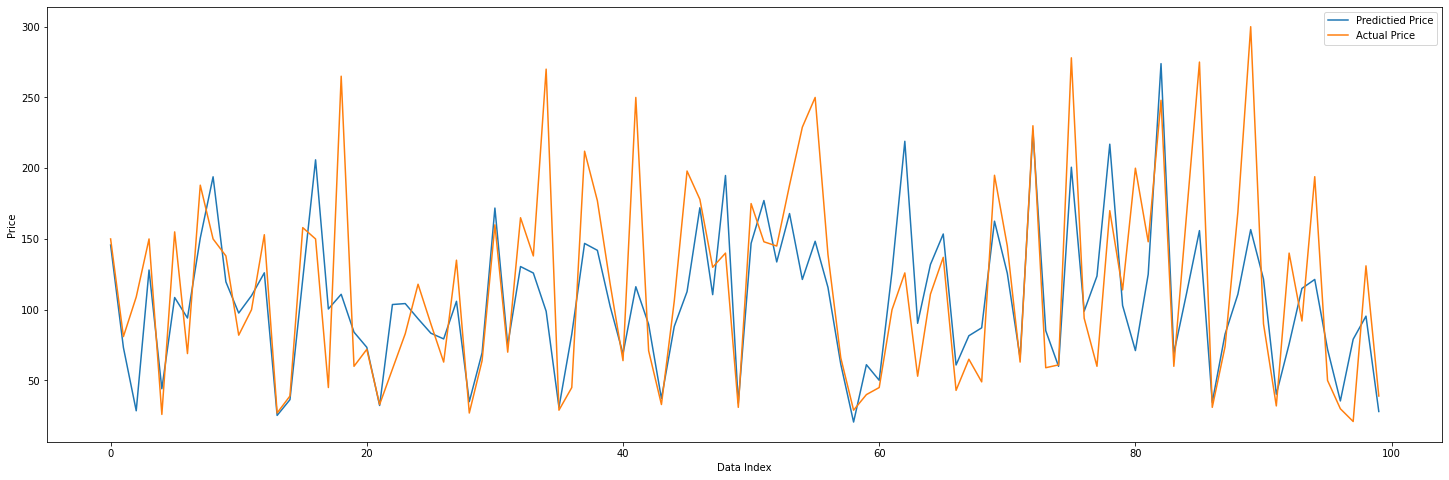

In [73]:
compare_plt = compare.sample(n=100)
compare_plt.reset_index(drop=True, inplace=True)
plt.figure(figsize=[25,8])
plt.plot(compare_plt.index,compare_plt['prediction'], label='Predictied Price')
plt.plot(compare_plt.index, compare_plt['actual'], label='Actual Price')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [79]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPEann = MAPE(y_test, y_pred)
print('MAPE = '+ str(MAPEann))

MAPE = 32.08424516821371


# Modelling SVM

In [90]:
from sklearn import svm
from sklearn.svm import SVR
# Buat model menggunakan support vector machine
svmRBF = svm.SVR(kernel='linear')

# Lakukan training dengan dataset train
svmRBF.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
y_predsvm = svmRBF.predict(x_test)
comparesvm = pd.DataFrame({'prediction': y_predsvm, 'actual': y_test})
comparesvm.head()

,prediction,actual
2778,88.618911,135.0
2056,78.146579,98.0
4036,158.079155,147.0
1933,82.758411,48.0
1043,50.686332,65.0


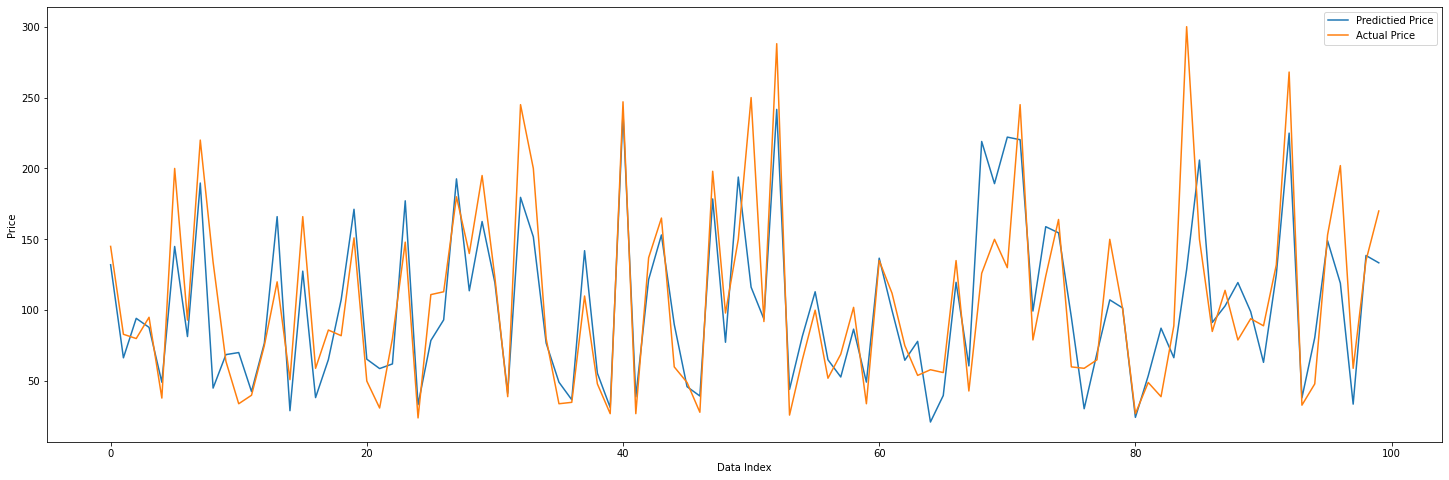

In [94]:
comparesvm_plt = compare.sample(n=100)
comparesvm_plt.reset_index(drop=True, inplace=True)
plt.figure(figsize=[25,8])
plt.plot(comparesvm_plt.index,comparesvm_plt['prediction'], label='Predictied Price')
plt.plot(comparesvm_plt.index, comparesvm_plt['actual'], label='Actual Price')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [93]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
MAPEsvm = MAPE(y_test, y_predsvm)
print('MAPE = '+ str(MAPEsvm))

MAPE = 46.4384037656349
